#***Neural Network for Recommendation Systems***


<img src="images/IMG_1091.jpg" alt="drawing" width="500"/>

So when we talk about Recomender System in the real-world we have to imagine an
hybrid system, in whitch Content-Based, Collaborative Filtering and knowledge-based are implement in the same model.

<img src="images/IMG_1096.jpg" alt="drawing" width="500"/>

##***Structured and Unstructured Data***

***Content-based recommendation models***

<img src="images/IMG_1093.jpg" alt="drawing" width="500"/>

***Collaborative filtering***

<img src="images/IMG_1094.jpg" alt="drawing" width="500"/>


***Knowledge-based***

<img src="images/IMG_1095.jpg" alt="drawing" width="500"/>

***Hybrid model***

<img src="images/IMG_1092.jpg" alt="drawing" width="500"/>

##***Content-Based Filtering overview***
Uses item features to recommend new items that are similar to what the user has liked in the past. Content-based does not take into account the behavior or ratings of other users.

<img src="images/IMG_1119.jpg.jpg" alt="drawing" width="500"/>

<img src="images/IMG_1118.jpg.jpg" alt="drawing" width="500"/>

The user space and product space are ***sparse*** and ***skewed***. This means that most item are rated by very few users, and most users rate only a small fraction of items. Furthermore, some properties are very popular and some users are very prolific.

To feed a Neural Networks for Recommendetion System, cause of the sparse dataset we define the features columns to use in our model into a dense representation. TensorFlow allows us to do this using [various feature columns](https://www.tensorflow.org/api_docs/python/tf/feature_column).



***Examples of feature columns:***

- [`tf.feature_column.categorical_column_with_hash_bucket
`](https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_hash_bucket)
- [`tf.feature_column.embedding_column`](https://www.tensorflow.org/api_docs/python/tf/feature_column/embedding_column)


    items_id_column = tf.feature_column.categorical_column_with_hash_bucket(
    key="items_id",
    hash_bucket_size= len(content_ids_list) + 1)

    embedded_content_column = tf.feature_column.embedding_column(
    categorical_column=items_id_column,
    dimension=10)

- [`tf.feature_column.categorical_column_with_vocabulary_list
`](https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list)
- [`tf.feature_column.indicator_column`](https://www.tensorflow.org/api_docs/python/tf/feature_column/indicator_column)


    category_column_categorical = tf.feature_column.categorical_column_with_vocabulary_list(
    key="category",
    vocabulary_list=categories_list,
    num_oov_buckets=1)

    category_column = tf.feature_column.indicator_column(category_column_categorical)

We use the input_layer feature column to create the dense input layer to our network. We can adjust the number of hidden units as a parameter.

    net = tf.feature_column.input_layer(features, params['feature_columns'])
    for units in params['hidden_units']:
        net = tf.layers.dense(net, units=units, activation=tf.nn.relu)
     #Compute logits (1 per class).
    logits = tf.layers.dense(net, params['n_classes'], activation=None)

##***Collaborative Filtering overview***
Collaborative filtering recommendations use similarities between items and the user simultaneously in an embedding space. In collaborative filtering the ***only thing we need are: user_id, item-id and rating***. The latter can be ***explicit*** or ***implicit***. Another importan thing is to trasfom all the variables in integer.




***Embedding space***

Each user and item is a k-dimensional point within an embedding space. Embeddings can be ***learned from data***. The idea is to compressing the data to find the best generalites to rely on, called ***latent factors***. The factorization split the users-interactions matrix into ***row factors*** and ***column factors*** that are essentially user and item embedding.

Our goal is to factorize the ratings matrix $A$ into the product of a user embedding matrix $U$ and movie embedding matrix $V$, such that:

 $A \approx UV^\top$ with
$U = \begin{bmatrix} u_{1} \\ \hline \vdots \\ \hline u_{N} \end{bmatrix}$ and
$V = \begin{bmatrix} v_{1} \\ \hline \vdots \\ \hline v_{M} \end{bmatrix}$.

- $N$ is the number of users,
- $M$ is the number of movies,
- $A_{ij}$ is the rating of the $j$th movies by the $i$th user,
- each row $U_i$ is a $d$-dimensional vector (embedding) representing user $i$,
- each rwo $V_j$ is a $d$-dimensional vector (embedding) representing movie $j$,
- the prediction of the model for the $(i, j)$ pair is the dot product $\langle U_i, V_j \rangle$.



***Sparse Representation of the Rating Matrix***

As we have already mention the rating matrix could be very sparse. In our help comes [tf.SparseTensor](https://www.tensorflow.org/api_docs/python/tf/SparseTensor). 

A `SparseTensor` uses three tensors to represent the matrix: `tf.SparseTensor(indices, values, dense_shape)` represents a tensor, where a value $A_{ij} = a$ is encoded by setting `indices[k] = [i, j]` and `values[k] = a`. The last tensor `dense_shape` is used to specify the shape of the full underlying matrix.

***Example***

Assume we have $2$ users, $4$ movies and $3$ ratings:

user\_id | movie\_id | rating
--:|--:|--:
0 | 0 | 5.0
0 | 1 | 3.0
1 | 3 | 1.0

The corresponding rating matrix is:

$$
A =
\begin{bmatrix}
5.0 & 3.0 & 0 & 0 \\
0   &   0 & 0 & 1.0
\end{bmatrix}
$$

And the SparseTensor representation is:

    SparseTensor(
    indices=[[0, 0], [0, 1], [1,3]],
    values=[5.0, 3.0, 1.0],
    dense_shape=[2, 4])



***Weighted ALS (WALS)***

There are many ways to handle unobserved user-interaction matrix pair. ***SVD*** explicitly sets all missing values to zero. ***ALS*** simply ingnores missing values. ***WALS*** uses weights instead of zeros that can be thought of a representing ***low confidence***.



***WALS***

\begin{eqnarray}
        \sum_{(i,j)\in obs}(A_{i,j}-U_iV_j)^2+w_0 \sum_{(i,j)\notin obs}(0-U_iV_j)^2
    \end{eqnarray}

An existing `WALSMatrixFactorization`
function in TensorFlow `tf.__version__ = 1.15` can be used to do ***matrix factorization with*** ***WALS***.

The main idea is the following:

Iterative:
- $U$ and $V$ are randomly generated,
- Fix $U$ and find, by solving a linear system, the best $V$,
- Fix $V$ and find, by solving a linear system, the best $U$.

The algorithm is guaranteed to converge and can be parallelised.

<img src="images/IMG_1123.jpg" alt="drawing" width="500"/>


The code for ***WALS using TensorFlow*** can be found at the following link [].
Below it is show how works remapping keys to SparseTensor to fix re-indexing after batching.

<img src="images/IMG_1113.jpg" alt="drawing" width="500"/>

##***Context-aware recommendation system CARS***
An important aspect concerns the context in whitch the user perceives the experience. We are talk about to Adding Context.

- An item is not just an item.
- A user is not just a user.
- The context it is experienced in changes perception.
- This affects sentiment.
 

There are three main types of ***CARS*** algorithms:
- ***Contextual prefiltering,***
- ***Contextual postfiltering,***
- ***Contextual modeling.***
     

###***Contextual prefiltering***

<img src="images/IMG_1097.jpg" alt="drawing" width="500"/>

<img src="images/IMG_1098.jpg" alt="drawing" width="500"/>

<img src="images/IMG_1099.jpg" alt="drawing" width="500"/>

This is easy to see when we have a small toy data set like this,
but how would we do it for much larger and more complex data sets?
We simply can use a ***t-test*** on two chunks of ratings,
and ***choose what gives the maximum t value,
and thus the smallest p-value***.
There's a simple splitting,
when splitting across one dimension of context,
and complex splitting was putting over multiple dimensions of contexts.
***Complex splitting can have sparsity issues and can have overfitting problems***.
So, single splitting is often used to avoid these issues. 
There's also user splitting which it's extremely similar to item splitting,
except now we split along user rather than item

###***Contextual postfiltering***

<img src="images/IMG_1100.jpg" alt="drawing" width="500"/>

What happens to all the context dimensions?
Well, we simply ignore them.
We ignore a context.
We process the data as if it was just a user item interaction matrix. 
We then apply our users vector to
the output embeddings to get the representation in embedding space.
This gives us our recommendations.
But these are exactly the same as if we never had
contexts data. how do we fix this problem?
Well, we can try to adjust
our non-contractual recommendations by applying the context back in.

For example, if our user from before still wants to see a movie on
Thursday after work and on Thursday they usually watch action movies,
our postfiltering can filter out all non-action movies
for the recommendations returned by our non-contractual recommender.
This then gets us finally to the contextual recommendations that we wanted. 

###***Contextual modeling***

<img src="images/IMG_1101.jpg" alt="drawing" width="500"/>

***Deviation-Based Context-Aware Matrix Factorization (2011)***


In deviation-base context-aware matrix factorization,
we want to know how a user's rating is deviated across contexts.
This difference is called the ***contextual rating deviation***, or ***CRD***.
It looks at the deviations of users across contexts dimensions

<img src="images/IMG_1102.jpg" alt="drawing" width="500"/>

<img src="images/IMG_1103.jpg" alt="drawing" width="500"/>

***Traditional recommendation system***: use standard matrix factorization or bias matrix factorization.
Where we add a term for the global average rating,
a bias term for user u,
and a bias term for item i.
Of course, we have our user item interaction term,
which is the dot product of the users vector p,
from the user factor embedding matrix u,
and the items factor vector q,
from the item factor embedding matrix v.

\begin{eqnarray}
        r^*_{ui} = \mu + b_u + b_i + p_u^Tq_i.
    \end{eqnarray}

***Context-aware matrix factorization***: We can see, that almost everything is the same,
except for two terms.
On the right-hand side,
we have added the contextual rating deviations, summed across contexts.
This gives us contextual multidimensional ratings on the left-hand side.

\begin{eqnarray}
        r^*_{uic_1c_2...c_N} = \mu + b_u + b_i + p_u^Tq_i + \sum_{j=1}^CRD(c_j).
    \end{eqnarray}



##***YouTube Recommendation System Case Study***

YouTube's Recommender System consists of
two neural networks and many different data sources.
There's a candidate generation network that accepts millions of video corpuses.
The output of this network, is the input to a ranking network combined with other candidate sources,
which could be things like videos in the news for freshness,
videos for neighboring videos,related videos, or sponsored videos.
This is also combined with video features.

<img src="images/IMG_1104.jpg" alt="drawing" width="500"/>

***High precision*** means that every candidate generated is relevant to user.
Obviously, this is important because users do not want to be shown
irrelevant videos.

***High recall*** means that it will
recommend things the user will definitely like.

###***Candidate generation***

<img src="images/IMG_1087.jpg" alt="drawing" width="500"/>

The first step for candidate generation is see the item embeddings. We find the last 10 videos watched by the user and
use the embeddings to get their vectors within embedding space. Than we average the embeddings of those 10 videos, so we'll have a resultant single embedding that is the average along each embedding dimension. This becomes the watch vector,
which will be one of the features to our deep neural network.

We would do the same thing with past search queries.
Collaborative filtering for 
next search term is a collaborative filtering model that is similar to 
the user history based collaborative filter we talked about earlier.
Essentially, this is like doing to word to vec on pairs of search terms.
We will find an average search and this will become our search vector.
Another input feature to our deep neural network.

We also should add any knowledge we have about the user.
Location is important so you just conceive localised videos and
also because of language.

<img src="images/IMG_1088.jpg" alt="drawing" width="500"/>

Taking the top n of these videos is probably what we want.
These come out of a ***softmax*** for training. 
There's also a benefit to finding the closest users and generating those candidates as well (*this is the way that viral videos are created*).
Therefore, we can treat the layer right before softmax as a user embedding.
This is also a benefit to finding videos related content wise to the video that are currently watching.
Therefore, we can use the output of the DNN Classifier as video vectors.
This compounded with the user embeddings layer generates candidates during serving, so nearest neighbors consist of neighboring users and neighboring videos.


###***Ranking***
The first step, is to take the video suggest to the user.
These get combined with the videos watched by the user, both get used as individual video embeddings, and as an average embedding. These input features all feed through the ranking neural networks layers, the output of the DNN classifier is the ranking.

<img src="images/IMG_1089.jpg" alt="drawing" width="500"/>

During training time, the output is a weighted logistic function, 
whereas during serving, it as just a logistic. 
Serving uses logistic regression for scoring the videos and is optimized for expected watch time from the training labels. 
This is used instead of expected click, 
because then the recommendations could favor clickbait videos over actual good recommendations.
For training because we are using the expected watch time, we use the weighted logistic instead.
The watch time is used as the weight for positive interactions, and negative interactions just get a unit weight.

<img src="images/IMG_1090.jpg" alt="drawing" width="500"/>


#***Example: Softmax DNN for Recommendation (Movies Recommendation)***
Softmax treats the problem as a multiclass prediction problem in which:

- The input is the user query.
- The output is a probability vector with size equal to the number of items in the corpus, representing the probability to interact with each item; for example, the probability to click on or watch a YouTube video.
  

***Input***

- ***dense features*** (for xample, watch time and time since last watch).
-***Sparse features***(for example, watch history and country).


***Model***

The model is based adding hidden layers whit non-linear activation functions (i.e.ReLu, Leaky ReLu ...). This speed up the reserch of the minimum during the optimization, and capture more complex relatioships in the data. We will denote the output of the last hidden layer by $ψ(x) \in ℜ^d$.

The model maps the output of the last hidden layer $ψ(x)$ throught a softmax layer to a probability distribution $P=h(\psi(x)V^T)$, where:
- $h: ℜ^m \to ℜ^m$, is the softmax function.
- $V \in \Re^{mxd}$ is the matrix of weights of the softmax layer.
   
<img src="images/softmaxmodel.png" alt="drawing" width="500"/>

***Softmax cross entropy loss***
Entropy of a random variable X is the level of uncertainty inherent in the variables possible outcome.

Is the generalization of the classical ***binary cross-entropy***. Recall that the softmax model maps the input features x to a user embedding $ψ(x)∈R^d$, where $d$ is the embedding dimension. This vector is then multiplied by a movie embedding matrix $V∈R^{m×d}$ (where $m$ is the number of movies), and the final output of the model is the softmax of the product.

\begin{eqnarray}
        p^* = softmax(\psi(x)V^T).
    \end{eqnarray}

Given a target label $y$, if we denote by $p=1_y$ a one-hot encoding of this target label, then the loss is the ***cross-entropy*** between $p^*(x)$ and $p$.

Using TensorFlow, we will write a function that takes tensors representing the user embeddings $\psi(x)$, movie embeddings $V$, target label $y$, and return the cross-entropy loss, using the function [`tf.nn.sparse_softmax_cross_entropy_with_logits`](https://www.tensorflow.org/api_docs/python/tf/nn/sparse_softmax_cross_entropy_with_logits), which takes `logits` as input, where `logits` refers to the product $\psi(x) V^\top$.

***Negative Sampling and Folding***

Since the loss function compares two probability vectors $p, p(x) \in \Re^n$ (the ground truth and the output of the model, respectively), computing the gradient of the loss (for a single query) can be prohibitively expensive if the corpus size is too big.

You could set up a system to compute gradients only on the ***positive items (items that are active in the ground truth vector)***. However, if the system only trains on positive pairs, the model may suffer from ***folding***.

<img src="images/folding.png" alt="drawing" width="500"/>

In the following figure, assume that each color represents a different category of queries and items. Each query (represented as a square) only mostly interacts with the items (represented as a circle) of the same color (different language in YouTube9.

The model may learn how to place the query/item embeddings of a given color relative to each other (correctly capturing similarity within that color), but embeddings from different colors may end up in the same region of the embedding space, by chance. This phenomenon, known as ***folding***, can lead to spurious recommendations: at query time, ***the model may incorrectly predict a high score for an item from a different group***.

***Negative examples*** are items labeled "irrelevant" to a given query. Showing the model negative examples during training teaches the model that embeddings of different groups should be pushed away from each other.

More precisely, we compute an approximate gradient, using the following items:

- All positive items (the ones that appear in the target label)
- A sample of negative items ($j$ in $1,2,...,n)$

One possible strategies for sampling negatives is given higher probability to items $j$ with higher score $ψ(x)$. these are examples that contribute the most to the gradient); these examples are often called ***hard negatives***. 

***DNN and Matrix Factorization***

In both the softmax model and the matrix factorization model, the system learns one embedding vector $V_j$ per item $j$. What we called the item embedding matrix $V \in ℜ^{nxd}$ in matrix factorization is now the matrix of weights of the softmax layer.

The query embeddings, however, are different. Instead of learning one embedding $U_i$ per query $i$, the system learns a mapping from the query feature $x$ to an embedding $ψ(x) \in \Re^n$. Therefore, you can think of this DNN model as a generalization of matrix factorization, in which you replace the query side by a nonlinear function $\psi(x)$.

##***Preliminaries***
We will create a movie recommendation system based on the [MovieLens](https://movielens.org/) dataset available [here](http://grouplens.org/datasets/movielens/).  The data consists of movies ratings (on a scale of 1 to 5).
Concepts here are available in the course of [Recommender system using TensorFlow on GCP](https://www.coursera.org/learn/recommendation-models-gcp).

***Objectives***
- Explore the MovieLens Data
- Train a matrix factorization model
- Inspect the Embeddings
- Perform Softmax model training

In [ ]:
# Ensure the right version of Tensorflow is installed.
!pip freeze | grep tensorflow==2.6

In [ ]:
from __future__ import print_function

import numpy as np
import pandas as pd
import collections
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
from matplotlib import pyplot as plt
import sklearn
import sklearn.manifold
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Add some convenience functions to Pandas DataFrame.
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.3f}'.format
def mask(df, key, function):
  """Returns a filtered dataframe, by applying function to key"""
  return df[function(df[key])]

def flatten_cols(df):
  df.columns = [' '.join(col).strip() for col in df.columns.values]
  return df

pd.DataFrame.mask = mask
pd.DataFrame.flatten_cols = flatten_cols

In [ ]:
#Let's install Altair for interactive visualizations
!pip install git+git://github.com/altair-viz/altair.git
import altair as alt
alt.data_transformers.enable('default', max_rows=None)

  Cloning git://github.com/altair-viz/altair.git to /tmp/pip-req-build-lxm06emr
  Running command git clone -q git://github.com/altair-viz/altair.git /tmp/pip-req-build-lxm06emr
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


DataTransformerRegistry.enable('default')

Download the MovieLens Data, and create DataFrames containing movies, users, and ratings.

In [ ]:
# Download MovieLens data.
print("Downloading movielens data...")
from urllib.request import urlretrieve
import zipfile

urlretrieve("http://files.grouplens.org/datasets/movielens/ml-100k.zip", "movielens.zip")
zip_ref = zipfile.ZipFile('movielens.zip', "r")
zip_ref.extractall()
print("Done. Dataset contains:")
print(zip_ref.read('ml-100k/u.info'))

Done. Dataset contains:
b'943 users\n1682 items\n100000 ratings\n'


In [ ]:
# Load each data set (users, ratings, and movies).
users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(
    'ml-100k/u.user', sep='|', names=users_cols, encoding='latin-1')

ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')

# The movies file contains a binary feature for each genre.
genre_cols = [
    "genre_unknown", "Action", "Adventure", "Animation", "Children", "Comedy",
    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
    "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]
movies_cols = [
    'movie_id', 'title', 'release_date', "video_release_date", "imdb_url"
] + genre_cols
movies = pd.read_csv(
    'ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')

# Since the ids start at 1, we shift them to start at 0. This will make handling of the
# indices easier later
users["user_id"] = users["user_id"].apply(lambda x: str(x-1))
movies["movie_id"] = movies["movie_id"].apply(lambda x: str(x-1))
movies["year"] = movies['release_date'].apply(lambda x: str(x).split('-')[-1])
ratings["movie_id"] = ratings["movie_id"].apply(lambda x: str(x-1))
ratings["user_id"] = ratings["user_id"].apply(lambda x: str(x-1))
ratings["rating"] = ratings["rating"].apply(lambda x: float(x))

In [ ]:
# Compute the number of movies to which a genre is assigned.
genre_occurences = movies[genre_cols].sum().to_dict()

# Since some movies can belong to more than one genre, we create different
# 'genre' columns as follows:
# - all_genres: all the active genres of the movie.
# - genre: randomly sampled from the active genres.
def mark_genres(movies, genres):
  def get_random_genre(gs):
    active = [genre for genre, g in zip(genres, gs) if g==1]
    if len(active) == 0:
      return 'Other'
    return np.random.choice(active)
  def get_all_genres(gs):
    active = [genre for genre, g in zip(genres, gs) if g==1]
    if len(active) == 0:
      return 'Other'
    return '-'.join(active)
  movies['genre'] = [
      get_random_genre(gs) for gs in zip(*[movies[genre] for genre in genres])]
  movies['all_genres'] = [
      get_all_genres(gs) for gs in zip(*[movies[genre] for genre in genres])]

mark_genres(movies, genre_cols)

# Create one merged DataFrame containing all the movielens data.
movielens = ratings.merge(movies, on='movie_id').merge(users, on='user_id')

In [ ]:
# Utility to split the data into training and test sets.
def split_dataframe(df, holdout_fraction=0.1):
  """Splits a DataFrame into training and test sets.
  Args:
    df: a dataframe.
    holdout_fraction: fraction of dataframe rows to use in the test set.
  Returns:
    train: dataframe for training
    test: dataframe for testing
  """
  test = df.sample(frac=holdout_fraction, replace=False)
  train = df[~df.index.isin(test.index)]
  return train, test

##***Exploring the Movielens Data***
***Users***

We create histograms to further understand the distribution of the users. We use Altair to create an interactive chart.

In [ ]:
# The following functions are used to generate interactive Altair charts.
# We will display histograms of the data, sliced by a given attribute.

# Create filters to be used to slice the data.
occupation_filter = alt.selection_multi(fields=["occupation"])
occupation_chart = alt.Chart().mark_bar().encode(
    x="count()",
    y=alt.Y("occupation:N"),
    color=alt.condition(
        occupation_filter,
        alt.Color("occupation:N", scale=alt.Scale(scheme='category20')),
        alt.value("lightgray")),
).properties(width=300, height=300, selection=occupation_filter)

# A function that generates a histogram of filtered data.
def filtered_hist(field, label, filter):
  """Creates a layered chart of histograms.
  The first layer (light gray) contains the histogram of the full data, and the
  second contains the histogram of the filtered data.
  Args:
    field: the field for which to generate the histogram.
    label: String label of the histogram.
    filter: an alt.Selection object to be used to filter the data.
  """
  base = alt.Chart().mark_bar().encode(
      x=alt.X(field, bin=alt.Bin(maxbins=10), title=label),
      y="count()",
  ).properties(
      width=300,
  )
  return alt.layer(
      base.transform_filter(filter),
      base.encode(color=alt.value('lightgray'), opacity=alt.value(.7)),
  ).resolve_scale(y='independent')


Next, we look at the distribution of ratings per user. Clicking on an occupation in the right chart will filter the data by that occupation. The corresponding histogram is shown in blue, and superimposed with the histogram for the whole data (in light gray). You can use SHIFT+click to select multiple subsets.



In [ ]:
users_ratings = (
    ratings
    .groupby('user_id', as_index=False)
    .agg({'rating': ['count', 'mean']})
    .flatten_cols()
    .merge(users, on='user_id')
)

# Create a chart for the count, and one for the mean.
alt.hconcat(
    filtered_hist('rating count', '# ratings / user', occupation_filter),
    filtered_hist('rating mean', 'mean user rating', occupation_filter),
    occupation_chart,
    data=users_ratings)

alt.HConcatChart(...)

***Movies***

It is also useful to look at information about the movies and their ratings.

In [ ]:
movies_ratings = movies.merge(
    ratings
    .groupby('movie_id', as_index=False)
    .agg({'rating': ['count', 'mean']})
    .flatten_cols(),
    on='movie_id')

genre_filter = alt.selection_multi(fields=['genre'])
genre_chart = alt.Chart().mark_bar().encode(
    x="count()",
    y=alt.Y('genre'),
    color=alt.condition(
        genre_filter,
        alt.Color("genre:N"),
        alt.value('lightgray'))
).properties(height=300, selection=genre_filter)

In [ ]:
(movies_ratings[['title', 'rating count', 'rating mean']]
 .sort_values('rating count', ascending=False)
 .head(10))

,title,rating count,rating mean
49,Star Wars (1977),583,4.358
257,Contact (1997),509,3.804
99,Fargo (1996),508,4.156
180,Return of the Jedi (1983),507,4.008
293,Liar Liar (1997),485,3.157
285,"English Patient, The (1996)",481,3.657
287,Scream (1996),478,3.441
0,Toy Story (1995),452,3.878
299,Air Force One (1997),431,3.631
120,Independence Day (ID4) (1996),429,3.438


In [ ]:
(movies_ratings[['title', 'rating count', 'rating mean']]
 .mask('rating count', lambda x: x > 20)
 .sort_values('rating mean', ascending=False)
 .head(10))

,title,rating count,rating mean
407,"Close Shave, A (1995)",112,4.491
317,Schindler's List (1993),298,4.466
168,"Wrong Trousers, The (1993)",118,4.466
482,Casablanca (1942),243,4.457
113,Wallace & Gromit: The Best of Aardman Animatio...,67,4.448
63,"Shawshank Redemption, The (1994)",283,4.445
602,Rear Window (1954),209,4.388
11,"Usual Suspects, The (1995)",267,4.386
49,Star Wars (1977),583,4.358
177,12 Angry Men (1957),125,4.344


The last chart shows the distribution of the number of ratings and average rating.

In [ ]:
# Display the number of ratings and average rating per movie.
alt.hconcat(
    filtered_hist('rating count', '# ratings / movie', genre_filter),
    filtered_hist('rating mean', 'mean movie rating', genre_filter),
    genre_chart,
    data=movies_ratings)

alt.HConcatChart(...)

##***Build a tf.SparseTensor representation of the Rating Matrix***
We will write a function that maps from our ratings DataFrame to a `tf.SparseTensor`.

In [ ]:
def build_rating_sparse_tensor(ratings_df):
  """
  Args:
    ratings_df: a pd.DataFrame with `user_id`, `movie_id` and `rating` columns.
  Returns:
    a tf.SparseTensor representing the ratings matrix.
  """
  indices = ratings_df[['user_id', 'movie_id']].values
  values = ratings_df['rating'].values
  return tf.SparseTensor(
      indices=indices,
      values=values,
      dense_shape=[users.shape[0], movies.shape[0]])

##***Mean Squared Error***

We create TensorFlow function that takes a sparse rating matrix $A$ and the two embedding matrices $U, V$ and returns the mean squared error $\text{MSE}(A, UV^\top)$.
- in this section, we only consider observed entries when calculating the loss.
- a `SparseTensor` `sp_x` is a tuple of three Tensors: `sp_x.indices`, `sp_x.values` and `sp_x.dense_shape`.
- we used also [`tf.gather_nd`](https://www.tensorflow.org/api_docs/python/tf/gather_nd) and  [`tf.losses.mean_squared_error`](https://www.tensorflow.org/api_docs/python/tf/losses/mean_squared_error) helpful.

In [ ]:
def sparse_mean_square_error(sparse_ratings, user_embeddings, movie_embeddings):
  """
  Args:
    sparse_ratings: A SparseTensor rating matrix, of dense_shape [N, M]
    user_embeddings: A dense Tensor U of shape [N, k] where k is the embedding
      dimension, such that U_i is the embedding of user i.
    movie_embeddings: A dense Tensor V of shape [M, k] where k is the embedding
      dimension, such that V_j is the embedding of movie j.
  Returns:
    A scalar Tensor representing the MSE between the true ratings and the
      model's predictions.
  """
  predictions = tf.gather_nd(
      tf.matmul(user_embeddings, movie_embeddings, transpose_b=True),
      sparse_ratings.indices)
  loss = tf.losses.mean_squared_error(sparse_ratings.values, predictions)
  return loss

Note: One approach is to compute the full prediction matrix $UV^\top$, then gather the entries corresponding to the observed pairs. The memory cost of this approach is $O(NM)$. For the MovieLens dataset, this is fine, as the dense $N \times M$ matrix is small enough to fit in memory ($N = 943$, $M = 1682$).

Another approach (given in the alternate solution below) is to only gather the embeddings of the observed pairs, then compute their dot products. The memory cost is $O(|\Omega| d)$ where $d$ is the embedding dimension. In our case, $|\Omega| = 10^5$, and the embedding dimension is on the order of $10$, so the memory cost of both methods is comparable. But when the number of users or movies is much larger, the first approach becomes infeasible.

In [ ]:
#Alternative Solution
def sparse_mean_square_error(sparse_ratings, user_embeddings, movie_embeddings):
  """
  Args:
    sparse_ratings: A SparseTensor rating matrix, of dense_shape [N, M]
    user_embeddings: A dense Tensor U of shape [N, k] where k is the embedding
      dimension, such that U_i is the embedding of user i.
    movie_embeddings: A dense Tensor V of shape [M, k] where k is the embedding
      dimension, such that V_j is the embedding of movie j.
  Returns:
    A scalar Tensor representing the MSE between the true ratings and the
      model's predictions.
  """
  predictions = tf.reduce_sum(
      tf.gather(user_embeddings, sparse_ratings.indices[:, 0]) *
      tf.gather(movie_embeddings, sparse_ratings.indices[:, 1]),
      axis=1)
  loss = tf.losses.mean_squared_error(sparse_ratings.values, predictions)
  return loss

##***Training a Matrix Factorization model. CFModel (Collaborative Filtering Model)***
This is a simple class to train a matrix factorization model using stochastic gradient descent.

The class constructor takes
- the user embeddings U (`tf.Variable`).
- the movie embeddings V (`tf.Variable`).
- a loss to optimize (`tf.Tensor`).
- an optional list of metrics dictionaries, each mapping a string (the name of the metric) to a tensor. These are evaluated and plotted during training (e.g. training error and test error).

After training, one can access the trained embeddings using the `model.embeddings` dictionary.

***Example usage:***
```
U_var = ...
V_var = ...
loss = ...
model = CFModel(U_var, V_var, loss)
model.train(iterations=100, learning_rate=1.0)
user_embeddings = model.embeddings['user_id']
movie_embeddings = model.embeddings['movie_id']
```


In [ ]:

class CFModel(object):
  """Simple class that represents a collaborative filtering model"""
  def __init__(self, embedding_vars, loss, metrics=None):
    """Initializes a CFModel.
    Args:
      embedding_vars: A dictionary of tf.Variables.
      loss: A float Tensor. The loss to optimize.
      metrics: optional list of dictionaries of Tensors. The metrics in each
        dictionary will be plotted in a separate figure during training.
    """
    self._embedding_vars = embedding_vars
    self._loss = loss
    self._metrics = metrics
    self._embeddings = {k: None for k in embedding_vars}
    self._session = None

  @property
  def embeddings(self):
    """The embeddings dictionary."""
    return self._embeddings

  def train(self, num_iterations=100, learning_rate=1.0, plot_results=True,
            optimizer=tf.train.GradientDescentOptimizer):
    """Trains the model.
    Args:
      iterations: number of iterations to run.
      learning_rate: optimizer learning rate.
      plot_results: whether to plot the results at the end of training.
      optimizer: the optimizer to use. Default to GradientDescentOptimizer.
    Returns:
      The metrics dictionary evaluated at the last iteration.
    """
    
    with self._loss.graph.as_default():
      opt = optimizer(learning_rate)
      train_op = opt.minimize(self._loss)
      local_init_op = tf.group(
          tf.variables_initializer(opt.variables()),
          tf.local_variables_initializer())
      if self._session is None:
        self._session = tf.Session()
        with self._session.as_default():
          self._session.run(tf.global_variables_initializer())
          self._session.run(tf.tables_initializer())
          #tf.train.start_queue_runners()

    with self._session.as_default():
      local_init_op.run()
      iterations = []
      metrics = self._metrics or ({},)
      metrics_vals = [collections.defaultdict(list) for _ in self._metrics]

      # Train and append results.
      for i in range(num_iterations + 1):
        _, results = self._session.run((train_op, metrics))
        if (i % 10 == 0) or i == num_iterations:
          print("\r iteration %d: " % i + ", ".join(
                ["%s=%f" % (k, v) for r in results for k, v in r.items()]),
                end='')
          iterations.append(i)
          for metric_val, result in zip(metrics_vals, results):
            for k, v in result.items():
              metric_val[k].append(v)

      for k, v in self._embedding_vars.items():
        self._embeddings[k] = v.eval()

      if plot_results:
        # Plot the metrics.
        num_subplots = len(metrics)+1
        fig = plt.figure()
        fig.set_size_inches(num_subplots*10, 8)
        for i, metric_vals in enumerate(metrics_vals):
          ax = fig.add_subplot(1, num_subplots, i+1)
          for k, v in metric_vals.items():
            ax.plot(iterations, v, label=k)
          ax.set_xlim([1, num_iterations])
          ax.legend()
      return results

Using the `sparse_mean_square_error` function, we will write a function that builds a `CFModel` by creating the embedding variables and the train and test losses.

In [ ]:
def build_model(ratings, embedding_dim=3, init_stddev=1.):
  """
  Args:
    ratings: a DataFrame of the ratings
    embedding_dim: the dimension of the embedding vectors.
    init_stddev: float, the standard deviation of the random initial embeddings.
  Returns:
    model: a CFModel.
  """
  # Split the ratings DataFrame into train and test.
  train_ratings, test_ratings = split_dataframe(ratings)
  # SparseTensor representation of the train and test datasets.
  A_train = build_rating_sparse_tensor(train_ratings)
  A_test = build_rating_sparse_tensor(test_ratings)
  # Initialize the embeddings using a normal distribution.
  U = tf.Variable(tf.random.normal(
      [A_train.dense_shape[0], embedding_dim], stddev=init_stddev))
  V = tf.Variable(tf.random.normal(
      [A_train.dense_shape[1], embedding_dim], stddev=init_stddev))
  train_loss = sparse_mean_square_error(A_train, U, V)
  test_loss = sparse_mean_square_error(A_test, U, V)
  metrics = {
      'train_error': train_loss,
      'test_error': test_loss
  }
  embeddings = {
      "user_id": U,
      "movie_id": V
  }
  return CFModel(embeddings, train_loss, [metrics])

Trying different parameters (embedding dimension, learning rate, iterations). The training and test errors are plotted at the end of training. We can inspect these values to validate the hyper-parameters.

***Note***: by calling `model.train` again, the model will continue training starting from the current values of the embeddings.

In [ ]:
# Build the CF model and train it.
model = build_model(ratings, embedding_dim=30, init_stddev=0.5)

 iteration 1000: train_error=0.378168, test_error=1.394656

[{'test_error': 1.3946561, 'train_error': 0.3781681}]

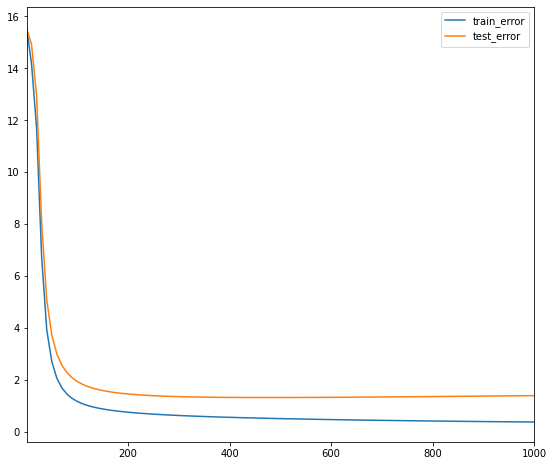

In [ ]:
model.train(num_iterations=1000, learning_rate=10.)

##***Inspecting the Embeddings***

Now we take a closer look at the learned embeddings, by
- computing recommendations
- looking at the nearest neighbors of some movies
- looking at the norms of the movie embeddings
- visualizing the embedding in a projected embedding space.

We start by writing a function that, given a query embedding $u \in \mathbb R^d$ and item embeddings $V \in \mathbb R^{N \times d}$, computes the item scores.

There are different similarity measures we can use, and these can yield different results. We will compare the following:
- dot product: the score of item j is $\langle u, V_j \rangle$.
- cosine: the score of item j is $\frac{\langle u, V_j \rangle}{\|u\|\|V_j\|}$.

- [`np.dot`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) to compute the product of two np.Arrays.
- [`np.linalg.norm`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.norm.html) to compute the norm of a np.Array.

In [ ]:
DOT = 'dot'
COSINE = 'cosine'
def compute_scores(query_embedding, item_embeddings, measure=DOT):
  """Computes the scores of the candidates given a query.
  Args:
    query_embedding: a vector of shape [k], representing the query embedding.
    item_embeddings: a matrix of shape [N, k], such that row i is the embedding
      of item i.
    measure: a string specifying the similarity measure to be used. Can be
      either DOT or COSINE.
  Returns:
    scores: a vector of shape [N], such that scores[i] is the score of item i.
  """
  u = query_embedding
  V = item_embeddings
  if measure == COSINE:
    V = V / np.linalg.norm(V, axis=1, keepdims=True)
    u = u / np.linalg.norm(u)
  scores = u.dot(V.T)
  return scores

Equipped with this function, we can compute recommendations, where the query embedding can be either a user embedding or a movie embedding.

In [ ]:

def user_recommendations(model, measure=DOT, exclude_rated=False, k=6):
  if USER_RATINGS:
    scores = compute_scores(
        model.embeddings["user_id"][943], model.embeddings["movie_id"], measure)
    score_key = measure + ' score'
    df = pd.DataFrame({
        score_key: list(scores),
        'movie_id': movies['movie_id'],
        'titles': movies['title'],
        'genres': movies['all_genres'],
    })
    if exclude_rated:
      # remove movies that are already rated
      rated_movies = ratings[ratings.user_id == "943"]["movie_id"].values
      df = df[df.movie_id.apply(lambda movie_id: movie_id not in rated_movies)]
    display.display(df.sort_values([score_key], ascending=False).head(k))  

def movie_neighbors(model, title_substring, measure=DOT, k=6):
  # Search for movie ids that match the given substring.
  ids =  movies[movies['title'].str.contains(title_substring)].index.values
  titles = movies.iloc[ids]['title'].values
  if len(titles) == 0:
    raise ValueError("Found no movies with title %s" % title_substring)
  print("Nearest neighbors of : %s." % titles[0])
  if len(titles) > 1:
    print("[Found more than one matching movie. Other candidates: {}]".format(
        ", ".join(titles[1:])))
  movie_id = ids[0]
  scores = compute_scores(
      model.embeddings["movie_id"][movie_id], model.embeddings["movie_id"],
      measure)
  score_key = measure + ' score'
  df = pd.DataFrame({
      score_key: list(scores),
      'titles': movies['title'],
      'genres': movies['all_genres']
  })
  display.display(df.sort_values([score_key], ascending=False).head(k))

In [ ]:
movie_neighbors(model, "Aladdin", DOT)
movie_neighbors(model, "Aladdin", COSINE)

Nearest neighbors of : Aladdin (1992).
[Found more than one matching movie. Other candidates: Aladdin and the King of Thieves (1996)]


,dot score,titles,genres
94,6.332,Aladdin (1992),Animation-Children-Comedy-Musical
312,5.775,Titanic (1997),Action-Drama-Romance
317,5.721,Schindler's List (1993),Drama-War
21,5.523,Braveheart (1995),Action-Drama-War
185,5.450,"Blues Brothers, The (1980)",Action-Comedy-Musical
63,5.351,"Shawshank Redemption, The (1994)",Drama


Nearest neighbors of : Aladdin (1992).
[Found more than one matching movie. Other candidates: Aladdin and the King of Thieves (1996)]


,cosine score,titles,genres
94,1.000,Aladdin (1992),Animation-Children-Comedy-Musical
0,0.856,Toy Story (1995),Animation-Children-Comedy
209,0.843,Indiana Jones and the Last Crusade (1989),Action-Adventure
317,0.833,Schindler's List (1993),Drama-War
14,0.833,Mr. Holland's Opus (1995),Drama
78,0.829,"Fugitive, The (1993)",Action-Thriller


We can observe that the recommendations with dot-product and cosine are different: with dot-product, the model tends to recommend popular movies. This can be explained by the fact that in matrix factorization models, the norm of the embedding is often correlated with popularity (popular movies have a larger norm), which makes it more likely to recommend more popular items. We can confirm this hypothesis by sorting the movies by their embedding norm, as done in the next cell.

***Note:*** Depending on how the model is initialized, you may observe that some niche movies (ones with few ratings) have a high norm, leading to spurious recommendations. This can happen if the embedding of that movie happens to be initialized with a high norm. Then, because the movie has few ratings, it is infrequently updated, and can keep its high norm. This can be alleviated by using regularization.



###***Embedding visualization***
Since it is hard to visualize embeddings in a higher-dimensional space (when the embedding dimension $k > 3$), one approach is to project the embeddings to a lower dimensional space. T-SNE (T-distributed Stochastic Neighbor Embedding) is an algorithm that projects the embeddings while attempting to preserve their pariwise distances. It can be useful for visualization, but one should use it with care. For more information on using t-SNE, see [How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/).

In [ ]:
tsne_movie_embeddings(model_lowinit)

Running t-SNE...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1682 samples in 0.000s...
[t-SNE] Computed neighbors for 1682 samples in 0.186s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


[t-SNE] Computed conditional probabilities for sample 1000 / 1682
[t-SNE] Computed conditional probabilities for sample 1682 / 1682
[t-SNE] Mean sigma: 0.116878


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.642784
[t-SNE] KL divergence after 400 iterations: 2.202600


alt.HConcatChart(...)

***Note:*** we can highlight the embeddings of a given genre by clicking on the genres panel (SHIFT+click to select multiple genres).

We can observe that the embeddings do not seem to have any notable structure, and the embeddings of a given genre are located all over the embedding space. This confirms the poor quality of the learned embeddings. One of the main reasons is that we only trained the model on observed pairs, and without regularization.

##***Softmax model***


We start from the ratings DataFrame, which we group by user_id.

In [ ]:
rated_movies = (ratings[["user_id", "movie_id"]]
                .groupby("user_id", as_index=False)
                .aggregate(lambda x: list(x)))
rated_movies.head()

,user_id,movie_id
0,0,"[60, 188, 32, 159, 19, 201, 170, 264, 154, 116..."
1,1,"[291, 250, 49, 313, 296, 289, 311, 280, 12, 27..."
2,10,"[110, 557, 731, 226, 424, 739, 722, 37, 724, 1..."
3,100,"[828, 303, 595, 221, 470, 404, 280, 251, 281, ..."
4,101,"[767, 822, 69, 514, 523, 321, 624, 160, 447, 4..."


We then create a function that generates an example batch, such that each example contains the following features:
- movie_id: A tensor of strings of the movie ids that the user rated.
- genre: A tensor of strings of the genres of those movies
- year: A tensor of strings of the release year.

In [ ]:
#batch generation code
years_dict = {
    movie: year for movie, year in zip(movies["movie_id"], movies["year"])
}
genres_dict = {
    movie: genres.split('-')
    for movie, genres in zip(movies["movie_id"], movies["all_genres"])
}

def make_batch(ratings, batch_size):
  """Creates a batch of examples.
  Args:
    ratings: A DataFrame of ratings such that examples["movie_id"] is a list of
      movies rated by a user.
    batch_size: The batch size.
  """
  def pad(x, fill):
    return pd.DataFrame.from_dict(x).fillna(fill).values

  movie = []
  year = []
  genre = []
  label = []
  for movie_ids in ratings["movie_id"].values:
    movie.append(movie_ids)
    genre.append([x for movie_id in movie_ids for x in genres_dict[movie_id]])
    year.append([years_dict[movie_id] for movie_id in movie_ids])
    label.append([int(movie_id) for movie_id in movie_ids])
  features = {
      "movie_id": pad(movie, ""),
      "year": pad(year, ""),
      "genre": pad(genre, ""),
      "label": pad(label, -1)
  }
  batch = (
      tf.data.Dataset.from_tensor_slices(features)
      .shuffle(1000)
      .repeat()
      .batch(batch_size)
      .make_one_shot_iterator()
      .get_next())
  return batch

def select_random(x):
  """Selectes a random elements from each row of x."""
  def to_float(x):
    return tf.cast(x, tf.float32)
  def to_int(x):
    return tf.cast(x, tf.int64)
  batch_size = tf.shape(x)[0]
  rn = tf.range(batch_size)
  nnz = to_float(tf.count_nonzero(x >= 0, axis=1))
  rnd = tf.random_uniform([batch_size])
  ids = tf.stack([to_int(rn), to_int(nnz * rnd)], axis=1)
  return to_int(tf.gather_nd(x, ids))


###***Loss function for the Softmax model***
The function takes tensors representing the user embeddings $\psi(x)$, movie embeddings $V$, target label $y$, and return the cross-entropy loss.

We use the function [`tf.nn.sparse_softmax_cross_entropy_with_logits`](https://www.tensorflow.org/api_docs/python/tf/nn/sparse_softmax_cross_entropy_with_logits), which takes `logits` as input, where `logits` refers to the product $\psi(x) V^\top$.

In [ ]:

def softmax_loss(user_embeddings, movie_embeddings, labels):
  """Returns the cross-entropy loss of the softmax model.
  Args:
    user_embeddings: A tensor of shape [batch_size, embedding_dim].
    movie_embeddings: A tensor of shape [num_movies, embedding_dim].
    labels: A tensor of [batch_size], such that labels[i] is the target label
      for example i.
  Returns:
    The mean cross-entropy loss.
  """
  # Verify that the embddings have compatible dimensions
  user_emb_dim = user_embeddings.shape[1].value
  movie_emb_dim = movie_embeddings.shape[1].value
  if user_emb_dim != movie_emb_dim:
    raise ValueError(
        "The user embedding dimension %d should match the movie embedding "
        "dimension % d" % (user_emb_dim, movie_emb_dim))

  logits = tf.matmul(user_embeddings, movie_embeddings, transpose_b=True)
  loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
      logits=logits, labels=labels))
  return loss

###***Build a softmax model, train it, and inspect its embeddings***

The input embeddings (movie_id, genre and year) are concatenated to form the input layer, then we have hidden layers with dimensions specified by the `hidden_dims` argument. Finally, the last hidden layer is multiplied by the movie embeddings to obtain the logits layer. For the target label, we will use a randomly-sampled movie_id from the list of movies the user rated.



In [ ]:
def build_softmax_model(rated_movies, embedding_cols, hidden_dims):
  """Builds a Softmax model for MovieLens.
  Args:
    rated_movies: DataFrame of traing examples.
    embedding_cols: A dictionary mapping feature names (string) to embedding
      column objects. This will be used in tf.feature_column.input_layer() to
      create the input layer.
    hidden_dims: int list of the dimensions of the hidden layers.
  Returns:
    A CFModel object.
  """
  def create_network(features):
    """Maps input features dictionary to user embeddings.
    Args:
      features: A dictionary of input string tensors.
    Returns:
      outputs: A tensor of shape [batch_size, embedding_dim].
    """
    # Create a bag-of-words embedding for each sparse feature.
    inputs = tf.feature_column.input_layer(features, embedding_cols)
    # Hidden layers.
    input_dim = inputs.shape[1].value
    for i, output_dim in enumerate(hidden_dims):
      w = tf.get_variable(
          "hidden%d_w_" % i, shape=[input_dim, output_dim],
          initializer=tf.truncated_normal_initializer(
              stddev=1./np.sqrt(output_dim))) / 10.
      outputs = tf.matmul(inputs, w)
      input_dim = output_dim
      inputs = outputs
    return outputs

  train_rated_movies, test_rated_movies = split_dataframe(rated_movies)
  train_batch = make_batch(train_rated_movies, 200)
  test_batch = make_batch(test_rated_movies, 100)

  with tf.variable_scope("model", reuse=False):
    # Train
    train_user_embeddings = create_network(train_batch)
    train_labels = select_random(train_batch["label"])
  with tf.variable_scope("model", reuse=True):
    # Test
    test_user_embeddings = create_network(test_batch)
    test_labels = select_random(test_batch["label"])
    movie_embeddings = tf.get_variable(
        "input_layer/movie_id_embedding/embedding_weights")

  test_loss = softmax_loss(
      test_user_embeddings, movie_embeddings, test_labels)
  train_loss = softmax_loss(
      train_user_embeddings, movie_embeddings, train_labels)
  _, test_precision_at_10 = tf.metrics.precision_at_k(
      labels=test_labels,
      predictions=tf.matmul(test_user_embeddings, movie_embeddings, transpose_b=True),
      k=10)

  metrics = (
      {"train_loss": train_loss, "test_loss": test_loss},
      {"test_precision_at_10": test_precision_at_10}
  )
  embeddings = {"movie_id": movie_embeddings}
  return CFModel(embeddings, train_loss, metrics)

***Train the Softmax***

We can set the following hyperparameters:
- learning rate
- number of iterations. Note: you can run `softmax_model.train()` again to continue training the model from its current state.
- input embedding dimensions (the `input_dims` argument)
- number of hidden layers and size of each layer (the `hidden_dims` argument)

***Note:*** since our input features are string-valued (movie_id, genre, and year), we need to map them to integer ids. This is done using [`tf.feature_column.categorical_column_with_vocabulary_list`](https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list), which takes a vocabulary list specifying all the values the feature can take. Then each id is mapped to an embedding vector using [`tf.feature_column.embedding_column`](https://www.tensorflow.org/api_docs/python/tf/feature_column/embedding_column).


Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprec

({'test_loss': 5.7555904, 'train_loss': 5.4945235},
 {'test_precision_at_10': 0.011883038987004333})

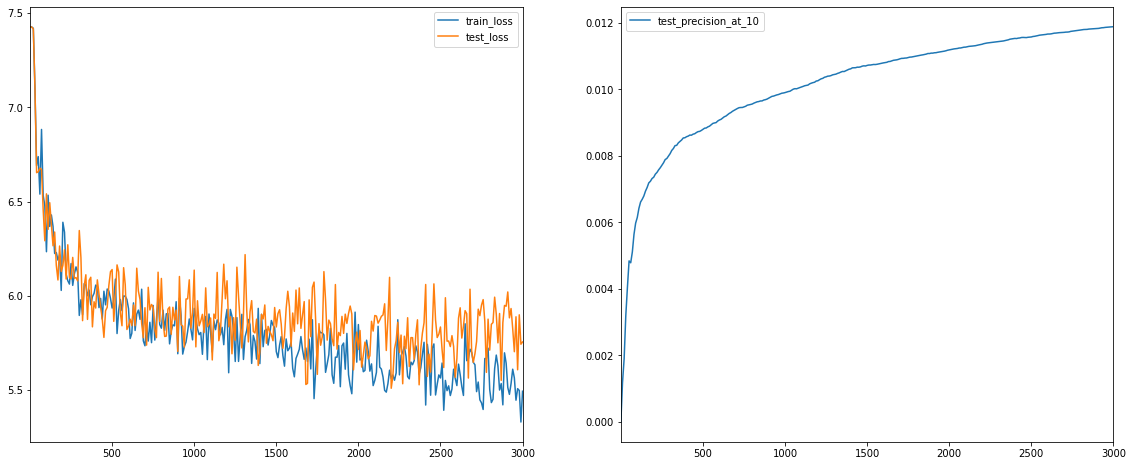

In [ ]:
# Create feature embedding columns
def make_embedding_col(key, embedding_dim):
  categorical_col = tf.feature_column.categorical_column_with_vocabulary_list(
      key=key, vocabulary_list=list(set(movies[key].values)), num_oov_buckets=0)
  return tf.feature_column.embedding_column(
      categorical_column=categorical_col, dimension=embedding_dim,
      # default initializer: trancated normal with stddev=1/sqrt(dimension)
      combiner='mean')

with tf.Graph().as_default():
  softmax_model = build_softmax_model(
      rated_movies,
      embedding_cols=[
          make_embedding_col("movie_id", 35),
          make_embedding_col("genre", 3),
          make_embedding_col("year", 2),
      ],
      hidden_dims=[35])

softmax_model.train(
    learning_rate=8., num_iterations=3000, optimizer=tf.train.AdagradOptimizer)

***Inspect the embedding***

We can inspect the movie embeddings as we did for the previous models. Note that in this case, the movie embeddings are used at the same time as input embeddings (for the bag of words representation of the user history), and as softmax weights.

In [ ]:
movie_neighbors(softmax_model, "Aladdin", DOT)
movie_neighbors(softmax_model, "Aladdin", COSINE)

Nearest neighbors of : Aladdin (1992).
[Found more than one matching movie. Other candidates: Aladdin and the King of Thieves (1996)]


,dot score,titles,genres
0,23.867,Toy Story (1995),Animation-Children-Comedy
49,20.889,Star Wars (1977),Action-Adventure-Romance-Sci-Fi-War
317,20.177,Schindler's List (1993),Drama-War
27,20.158,Apollo 13 (1995),Action-Drama-Thriller
180,19.832,Return of the Jedi (1983),Action-Adventure-Romance-Sci-Fi-War
287,19.820,Scream (1996),Horror-Thriller


Nearest neighbors of : Aladdin (1992).
[Found more than one matching movie. Other candidates: Aladdin and the King of Thieves (1996)]


,cosine score,titles,genres
94,1.000,Aladdin (1992),Animation-Children-Comedy-Musical
587,0.919,Beauty and the Beast (1991),Animation-Children-Musical
81,0.888,Jurassic Park (1993),Action-Adventure-Sci-Fi
171,0.869,"Empire Strikes Back, The (1980)",Action-Adventure-Drama-Romance-Sci-Fi-War
68,0.848,Forrest Gump (1994),Comedy-Romance-War
431,0.846,Fantasia (1940),Animation-Children-Musical


In [ ]:
tsne_movie_embeddings(softmax_model)

Running t-SNE...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1682 samples in 0.001s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


[t-SNE] Computed neighbors for 1682 samples in 0.200s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1682
[t-SNE] Computed conditional probabilities for sample 1682 / 1682
[t-SNE] Mean sigma: 0.188156


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.406605
[t-SNE] KL divergence after 400 iterations: 1.253288


alt.HConcatChart(...)

#***References***
[`Deep Neural Networks for YouTube Recommendations, Paul Covington, Jay Adams, Emre Sargin`](https://research.google/pubs/pub45530/)

[`Recommendation Systems with TensorFlow on GCP`](https://www.coursera.org/learn/recommendation-models-gcp)

[`Collaborative Filtering for Implicit Feedback Datasets, Hu, Koren, Volinsky`](http://yifanhu.net/PUB/cf.pdf)

[`Altair: Declarative Visualization in Python`](https://altair-viz.github.io/)

[`Recommended Reading for IR Research Students`](http://delab.csd.auth.gr/~dimitris/courses/ir_spring07/papers/Recommended%20reading%20for%20IR%20research%20students.pdf)
